In [1]:
import numpy
import math
from matplotlib import pyplot as plt
from scipy.stats import gamma
import numpy as np


In [2]:

#calculo de x_t
def x_t2(r, K, alpha, beta, x_0, lista):
    out = [(lista[0][0],x_0)]
    outQuad = [(lista[0][0],x_0**2)]
    tamanho = len(lista)
    for i in range(1,tamanho):
      out.append((lista[i][0],out[i-1][1] + r*out[i-1][1]*(K-alpha*out[i-1][1])*(lista[i][0]-lista[i-1][0])+beta*out[i-1][1]*(lista[i][1]-lista[i-1][1])))
      outQuad.append((lista[i][0],out[i][1]**2))

    return out, outQuad
    
#calculo esperança dos caminhos simulados
def espSim(lista, pos):
    aux=0
    for i in range(len(lista)):
        aux+=lista[i][pos][1]
    return aux/len(lista)



In [3]:

alpha = 1
#parametros da simulação
n = 500
k = 100
dt=1
t = [i*dt for i in range(k+1)]

if alpha != 0:
    r=0.0002
    K=1000
    beta=alpha*r*K/10
    x_0=700
elif alpha == 0:
    r=0.0002
    K=1000 
    beta=r*K
    x_0=2     



Text(0, 0.5, 'B_t')

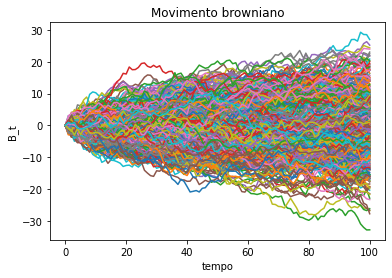

In [4]:
B = [[0] for i in range(n)] #array com variaveis aleatorias 
S = [[] for i in range(n)] #array com as variaveis aleatorias S~N(0,1)

#simulação movimentos brownianos
for j in range(n):
    for i in range(k):
        S[j].append(numpy.random.normal(0,1))

for j in range(n):
    for i in range(k):
        B[j].append(B[j][i] + dt**0.5*S[j][i])

#criação de tuplas(tempo, movimento browniano)
lista = [[] for i in range(n)]
for j in range(n):
    for i in range(k+1):
        lista[j].append((t[i], B[j][i]))

plt.title('Movimento browniano')
plt.xlabel('tempo')
plt.ylabel('B_t')

for i in range(n):
  plt.plot(*zip(*lista[i]))

plt.title('Movimento browniano')
plt.xlabel('tempo')
plt.ylabel('B_t')

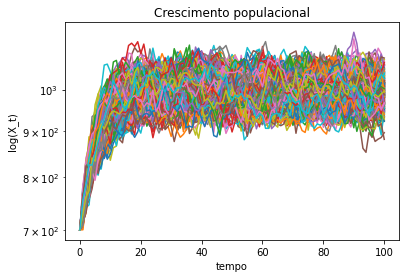

In [5]:


#calculo da variável aleatória x_t
lista2 = [[] for i in range(n)]
lista3 = [[] for i in range(n)]
for j in range(n):
    x, x2 = x_t2(r,K,alpha,beta,x_0, lista[j])
    lista2[j] = x
    lista3[j] = x2

plt.title('Crescimento populacional')
plt.xlabel('tempo')
plt.ylabel('log(X_t)')

for i in range(n):
    plt.semilogy(*zip(*lista2[i]), zorder = 1)

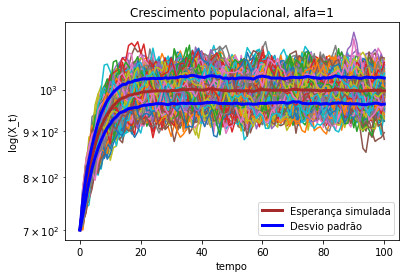

In [6]:
#calculo esperança simulada
espSimul = []
for i in range(k+1):
    espSimul.append((t[i], espSim(lista2, i)))

espQuadSimul = []
for i in range(k+1):
    espQuadSimul.append((t[i], espSim(lista3, i)) )

sdevUp = [(t[i], espSimul[i][1]+(espQuadSimul[i][1] - espSimul[i][1]**2)**0.5) for i in range(len(espQuadSimul))]
sdevDown = [(t[i], espSimul[i][1]-(espQuadSimul[i][1] - espSimul[i][1]**2)**0.5) for i in range(len(espQuadSimul))]

#plot caminhos e esperanças
plt.title('Crescimento populacional, alfa='+str(alpha))
plt.xlabel('tempo')
plt.ylabel('log(X_t)')

plt.semilogy(*zip(*espSimul), linewidth=3, color='brown', zorder=2)
plt.semilogy(*zip(*sdevUp), linewidth=3, color='blue', zorder =2)
plt.semilogy(*zip(*sdevDown), linewidth=3, color='blue', zorder =2)

for i in range(n):
    plt.semilogy(*zip(*lista2[i]), zorder = 1)

legenda = []
legenda.append("Esperança simulada")
legenda.append("Desvio padrão")


plt.legend(legenda)


999.0


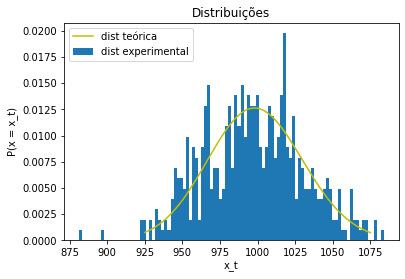

In [7]:
if alpha != 0:
  a, c = (2*r*K-beta**2)/(beta**2), 2*r*alpha/beta**2
  aux = [lista2[i][k][1] for i in range(len(lista2))]

  fig, ax = plt.subplots(1, 1)

  x = np.linspace (925, 1075, 4000) 
  y1 = gamma.pdf(x, a=a, scale=1/c)
  ax.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 

  ax.hist(aux, 100, density=True)

  ax.set_title('Distribuições')
  ax.set_xlabel('x_t')
  ax.set_ylabel('P(x = x_t)')

  legenda2 = []
  legenda2.append('dist teórica')
  legenda2.append('dist experimental')

  ax.legend(legenda2)


  print((2*r*K-beta**2)/(2*r*alpha))
